In [17]:
# ==============================
# Decision Tree using Gini Index
# Works with any Kaggle CSV dataset
# ==============================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# ==============================
# 1. Load dataset
# ==============================
# Replace with your dataset file name
file_path = "your_dataset.csv"

df = pd.read_csv(file_path)

print("Dataset Preview:")
print(df.head())


# ==============================
# 2. Select target column
# ==============================
# Change this to your target column name
target_column = "target"   # example: "Survived" or "Species"

X = df.drop(columns=[target_column])
y = df[target_column]


# ==============================
# 3. Encode categorical features
# ==============================
label_encoders = {}

for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

# Encode target if categorical
if y.dtype == "object":
    y = LabelEncoder().fit_transform(y)


# ==============================
# 4. Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ==============================
# 5. Train Decision Tree (Gini)
# ==============================
model = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
model.fit(X_train, y_train)


# ==============================
# 6. Predictions & accuracy
# ==============================
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nAccuracy:", round(accuracy * 100, 2), "%")


# ==============================
# 7. Feature importance
# ==============================
print("\nFeature Importance:")
for name, score in zip(X.columns, model.feature_importances_):
    print(f"{name}: {score:.4f}")


# ==============================
# 8. Plot decision tree
# ==============================
plt.figure(figsize=(12, 6))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=True,
    filled=True
)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

Accuracy: 100.0 %

Feature Importance:
sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.9346
petal width (cm): 0.0654


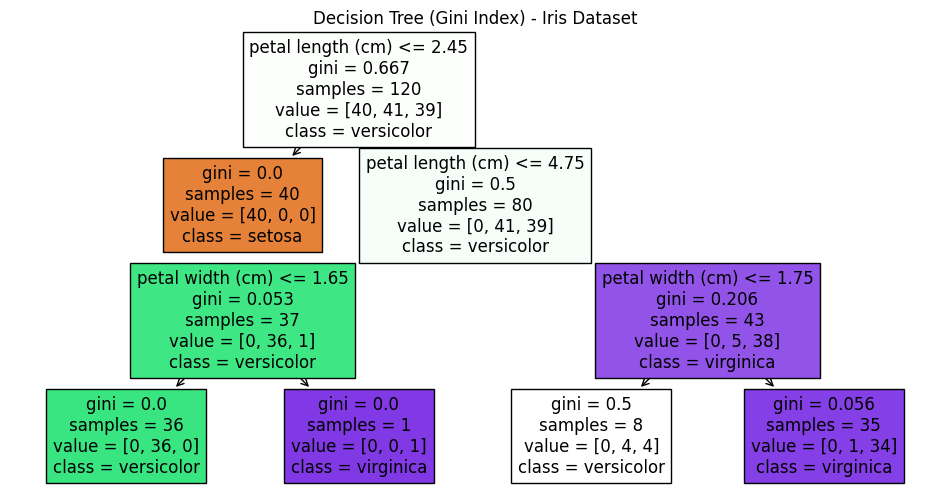

In [18]:
# ==============================
# Decision Tree on Iris Dataset
# Using Gini Index
# ==============================

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# ==============================
# 1. Load Iris dataset
# ==============================
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names


# ==============================
# 2. Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ==============================
# 3. Train Decision Tree (Gini)
# ==============================
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X_train, y_train)


# ==============================
# 4. Predictions & accuracy
# ==============================
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", round(accuracy * 100, 2), "%")


# ==============================
# 5. Feature importance
# ==============================
print("\nFeature Importance:")
for name, score in zip(feature_names, model.feature_importances_):
    print(f"{name}: {score:.4f}")


# ==============================
# 6. Plot decision tree
# ==============================
plt.figure(figsize=(12, 6))
plot_tree(
    model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True
)
plt.title("Decision Tree (Gini Index) - Iris Dataset")
plt.show()


Accuracy: 93.33 %
Precision: 0.9333
F1 Score: 0.9333


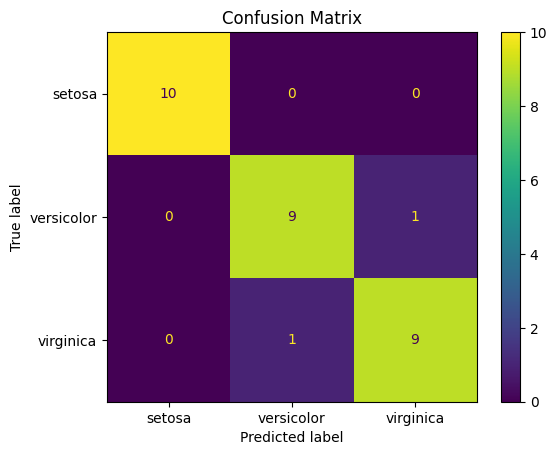

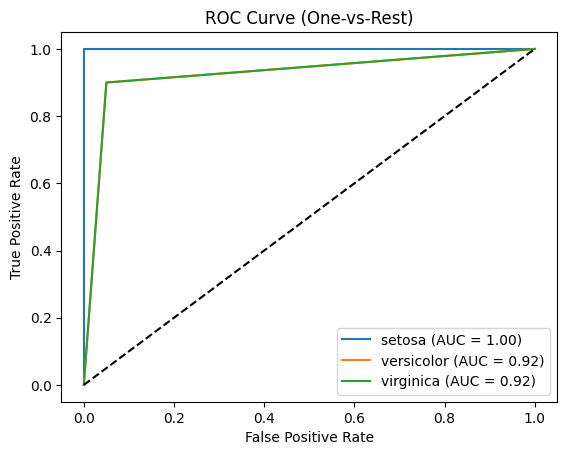

In [19]:
# ==============================
# Decision Tree on Iris Dataset
# Metrics: Accuracy, Precision, F1, ROC, Confusion Matrix
# ==============================

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


# ==============================
# 1. Load Iris dataset
# ==============================
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names


# ==============================
# 2. Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# ==============================
# 3. Train Decision Tree
# ==============================
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


# ==============================
# 4. Predictions
# ==============================
y_pred = model.predict(X_test)


# ==============================
# 5. Metrics
# ==============================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", round(accuracy * 100, 2), "%")
print("Precision:", round(precision, 4))
print("F1 Score:", round(f1, 4))


# ==============================
# 6. Confusion Matrix
# ==============================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


# ==============================
# 7. ROC Curve (One-vs-Rest)
# ==============================
# Binarize labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = model.predict_proba(X_test)

plt.figure()

for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend()
plt.show()
